# Task 5: To Explore Business Analytics

In [64]:
#Importing all the libraries and modules needed to complete this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Loading the given 'SampleSuperstore' dataset into pandas dataframe
df=pd.read_csv('C:/Users/Souvik/Desktop/tsf/SampleSuperstore.csv')
# displaying the first 10 rows of the dataframe
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [66]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [67]:
# displaying the number of rows and columns of the dataframe
df.shape

(9994, 13)

#### The dataframe has 9994 rows and 13 columns.

In [68]:
#Checking for duplicate rows in the dataframe
df.duplicated().sum()

17

#### 17 duplicate rows found!

In [69]:
# Dropping 17 duplicated rows to ensure accuracy in further analysis of the data
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

#### The number of rows reduced to 9977 after removing the 17 duplicated rows while the number of columns remained same.

In [70]:
# displaying the names of the columns present in the dataframe
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [71]:
# checking for null values in the columns
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

#### No null values found.

In [72]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

#### It is clear that the data is for United States only and there is no other country. So, we drop the 'Country' column as we do not need any analysis to be done based on this column.

In [73]:
#dropping Country column
df=df.drop('Country',axis=1)
df.sample(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2177,Standard Class,Home Office,Salt Lake City,Utah,84106,West,Office Supplies,Binders,41.720,5,0.2,13.0375
2852,Second Class,Consumer,Oceanside,New York,11572,East,Furniture,Furnishings,14.980,1,0.0,6.8908
517,Standard Class,Home Office,Great Falls,Montana,59405,West,Office Supplies,Paper,11.960,2,0.0,5.3820
6924,Standard Class,Consumer,New York City,New York,10035,East,Office Supplies,Paper,23.660,7,0.0,10.8836
3754,Second Class,Corporate,Inglewood,California,90301,West,Office Supplies,Storage,354.900,5,0.0,17.7450
5393,Standard Class,Corporate,Wilmington,Delaware,19805,East,Office Supplies,Binders,213.080,7,0.0,102.2784
611,First Class,Corporate,Dallas,Texas,75217,Central,Office Supplies,Labels,15.712,4,0.2,5.6956
4241,Standard Class,Home Office,Los Angeles,California,90004,West,Office Supplies,Binders,20.232,3,0.2,6.5754
9316,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Office Supplies,Supplies,769.184,4,0.2,-163.4516
978,First Class,Consumer,Wilmington,North Carolina,28403,South,Office Supplies,Binders,3.282,2,0.7,-2.6256


In [74]:
#removing columns that aren't essential for Exploratory Data Analysis (EDA)
df=df.drop(['Postal Code'], axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [75]:
# displaying the number of rows and columns of the dataframe again
df.shape

(9977, 11)

#### There are 9977 rows and 11 columns on the dataframe after removing the duplicated rows and the unwanted columns.

In [76]:
# displaying 10 random rows of the dataframe after removal of unwanted rows and columns
df.sample(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7671,Second Class,Home Office,Everett,Massachusetts,East,Furniture,Bookcases,170.980,1,0.0,32.4862
8277,Standard Class,Home Office,Tampa,Florida,South,Office Supplies,Binders,34.860,2,0.7,-26.7260
7809,Standard Class,Consumer,Raleigh,North Carolina,South,Technology,Phones,108.784,2,0.2,10.8784
1076,First Class,Home Office,Columbus,Indiana,Central,Office Supplies,Art,40.880,7,0.0,10.6288
6033,Standard Class,Home Office,Los Angeles,California,West,Furniture,Furnishings,15.240,3,0.0,5.1816
7852,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Appliances,20.388,2,0.8,-53.0088
172,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Paper,110.960,2,0.0,53.2608
7515,Second Class,Consumer,Richmond,Kentucky,South,Office Supplies,Appliances,214.900,5,0.0,62.3210
3853,Standard Class,Home Office,San Francisco,California,West,Furniture,Furnishings,4.950,1,0.0,2.1780
3141,Same Day,Corporate,San Antonio,Texas,Central,Office Supplies,Binders,210.392,2,0.8,-336.6272


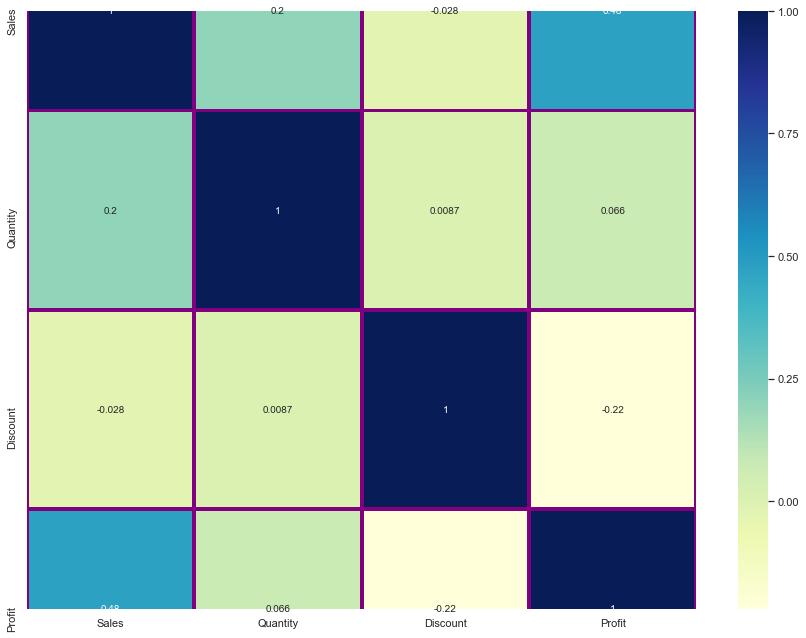

In [77]:
#plotting a heatmap to check the correlation between numeric columns only
df2=df.select_dtypes(include=[np.number])
fig = plt.figure(figsize=(15,11))
sns.heatmap(df2.corr(), cmap= 'YlGnBu',annot = True, linecolor = 'purple', linewidths = 3)
plt.show()

#### Unfortunately, the top and bottom of the heatmap has been cut off !

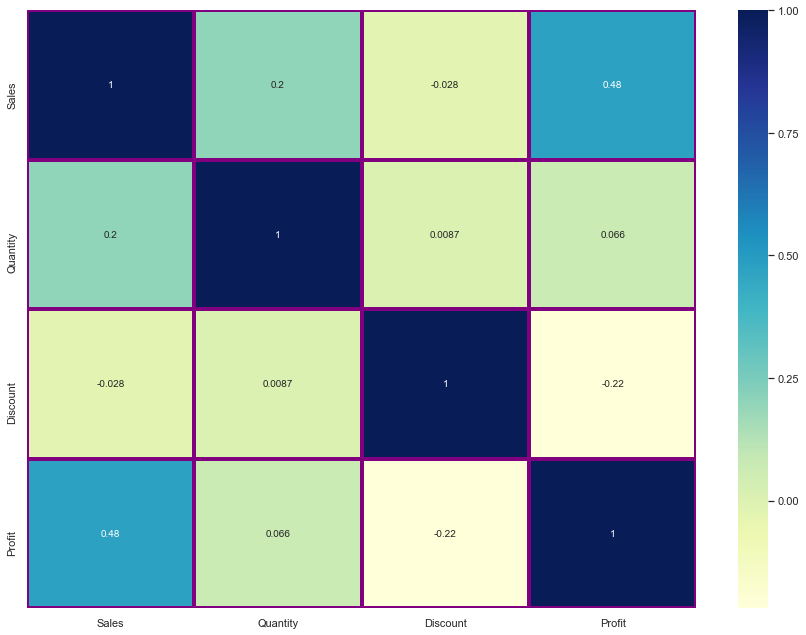

In [78]:
#plotting the heatmap again fixing the bug
fig = plt.figure(figsize=(15,11))
sns.heatmap(df2.corr(), cmap= 'YlGnBu',annot = True, linecolor = 'purple', linewidths = 3,)
# code to fix the bug that cuts off top and bottom of seaborn heatmap
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

#### Bug fixed! The heatmap is now plotted without any error. No strong correlations can be found from the above plot.

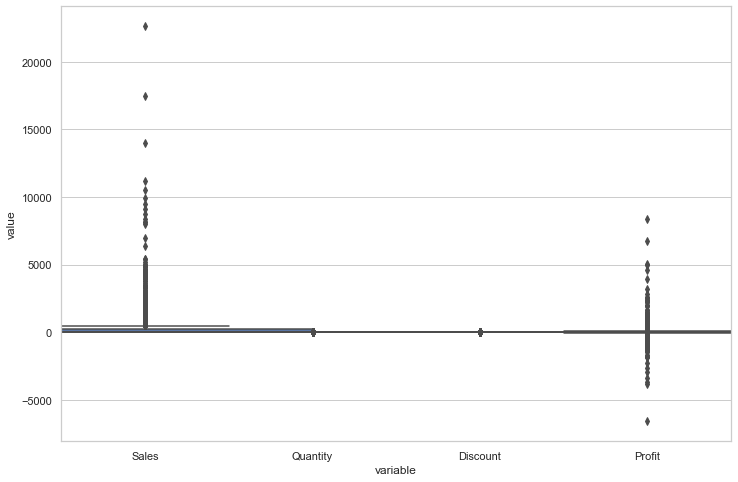

In [79]:
# detecting outliers using boxplot
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df2), width=2)
plt.show()

#### We can clearly see the outliers in Sales and Profit. We, therefore, remove the rows containing outliers in order to improve our results.

In [80]:
#removing the outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global df3      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                df3 = dataset.loc[dataset[col].isin(outlier)]
remove_outlier(df,k=3.33)

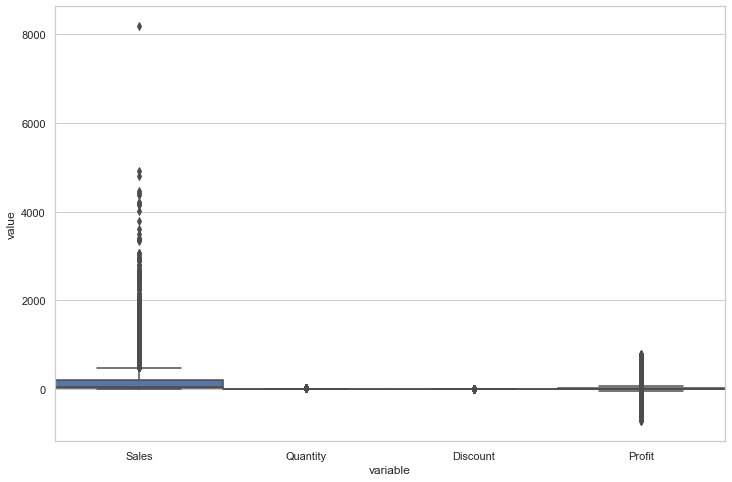

In [81]:
# checking whether the outliers are removed or not
df3_num=df3.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df3_num), width=1)
plt.show()

#### We can see that most of the outliers have been removed and now our dataframe is ready for analysis.

In [82]:
# displaying 1st 10 rows of our prepared dataframe
df3.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [83]:
df3['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### The dataframe has 3 Segments : Consumer, Corporate and Home Office.

In [84]:
# Number of products in each Segment
df3['Segment'].value_counts()

Consumer       5140
Corporate      2990
Home Office    1759
Name: Segment, dtype: int64

In [85]:
df3['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

#### The dataframe has 4 Ship Modes : Second Class, Standard Class, First Class and Same Day.

In [86]:
# Number of products for each Ship Mode
df3['Ship Mode'].value_counts()

Standard Class    5898
Second Class      1933
First Class       1521
Same Day           537
Name: Ship Mode, dtype: int64

In [87]:
df3['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

#### The dataframe has 3 Categories : Furniture, Office Supplies and Technology.

In [88]:
# number of products in each Category 
df3['Category'].value_counts()

Office Supplies    5975
Furniture          2111
Technology         1803
Name: Category, dtype: int64

In [89]:
#number of Sub-categories products are divided.
df3['Sub-Category'].nunique()

17

In [90]:
#number of products in each sub-category
df3['Sub-Category'].value_counts()

Binders        1489
Paper          1359
Furnishings     956
Phones          887
Storage         846
Art             795
Accessories     774
Chairs          615
Appliances      464
Labels          363
Tables          315
Envelopes       254
Bookcases       225
Fasteners       217
Supplies        188
Machines         92
Copiers          50
Name: Sub-Category, dtype: int64

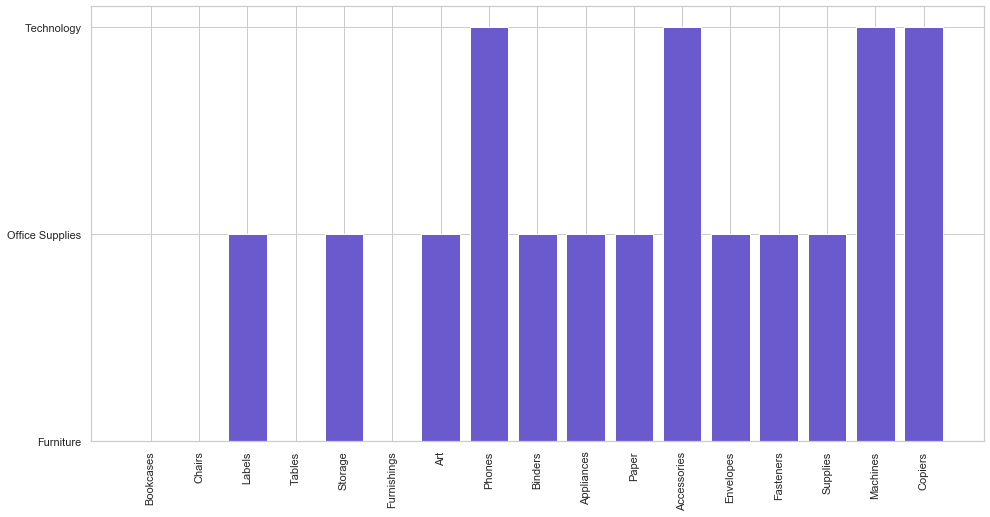

In [91]:
#Distribution of Sub-categories wrt to Category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df3,color='slateblue')
plt.xticks(rotation='vertical')
plt.show()

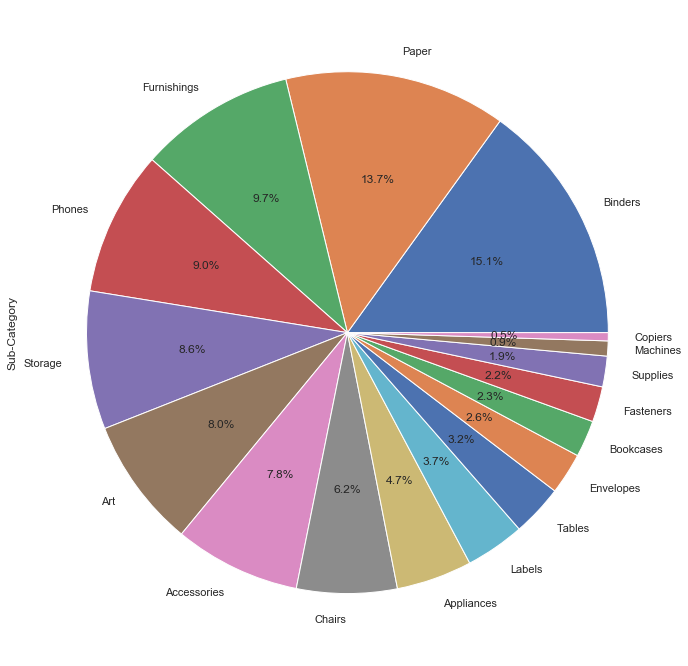

In [92]:
# Pie-chart of Sub-categories
plt.figure(figsize=(15,12))
df3['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### The store has a wide variety of  Binders and Paper.

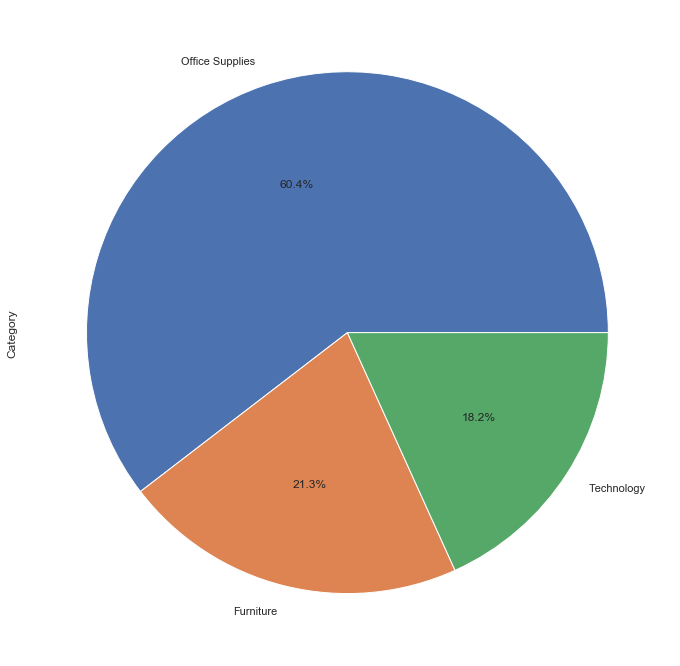

In [93]:
# Pie-chart of Categories
plt.figure(figsize=(15,12))
df3['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### The store has a wide variety of Office Supplies compared to Furniture and Technology.

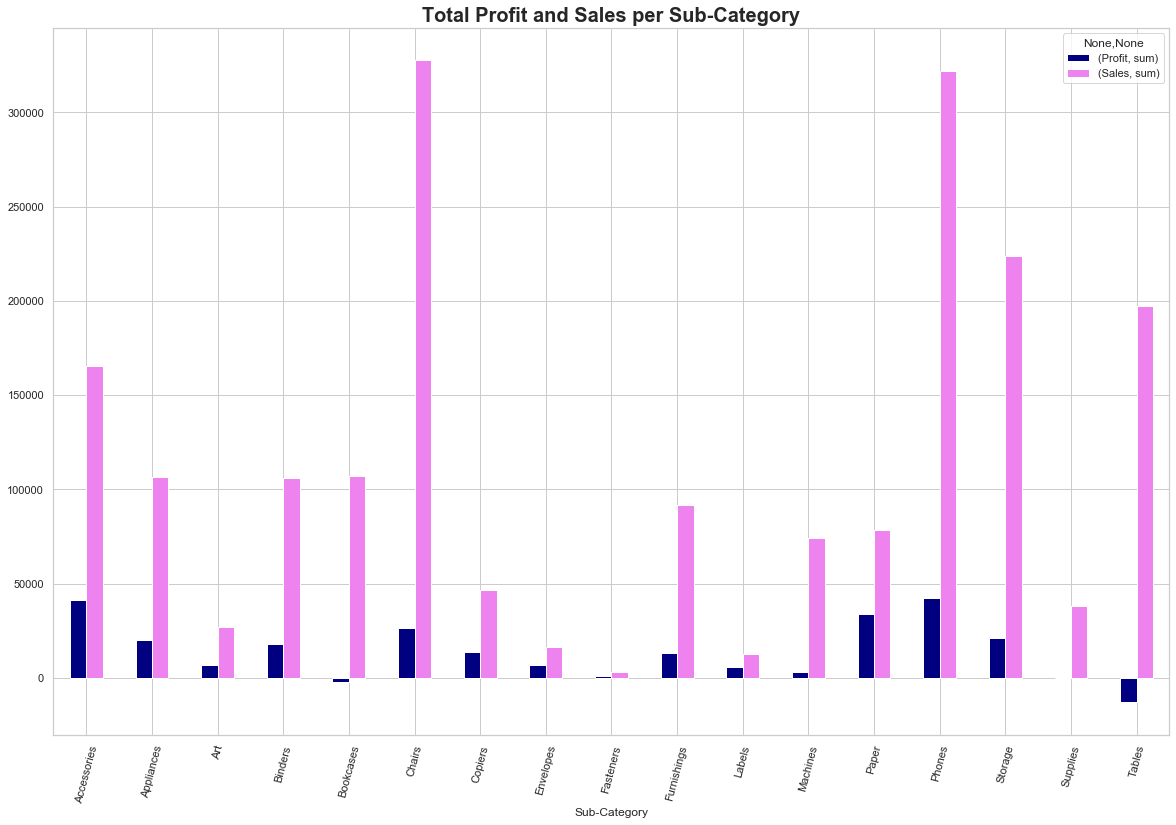

In [94]:
#Profit and Sales per Sub-category
df3.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=75,figsize=(20,13),color={'violet','navy'})
plt.title('Total Profit and Sales per Sub-Category',fontweight ='bold', fontsize=20)
plt.show()

#### Sales for Chairs and Phones are high compared to other products. Accessories and Phones make high profits. On the other hand, Bookcases and Tables are at a loss! Hence, more attention has to be given on Bookcases and Tables.

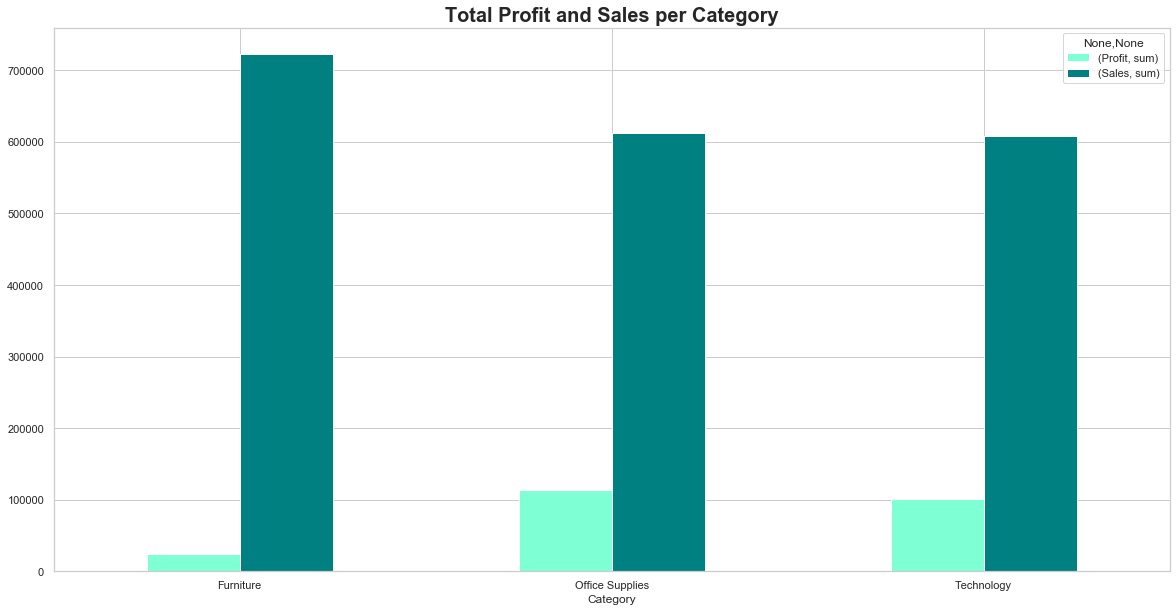

In [95]:
#Profit and Sales per Category
df3.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=0,figsize=(20,10),color={'aquamarine','teal'})
plt.title('Total Profit and Sales per Category',fontweight ='bold', fontsize=20)
plt.show()

#### The profit for all the categories is not much as seen from the plot above. Furniture has the highest Sales with the least Profit. Therefore, more focus has to be given on making maximum Profit in all categories especially in Furniture.

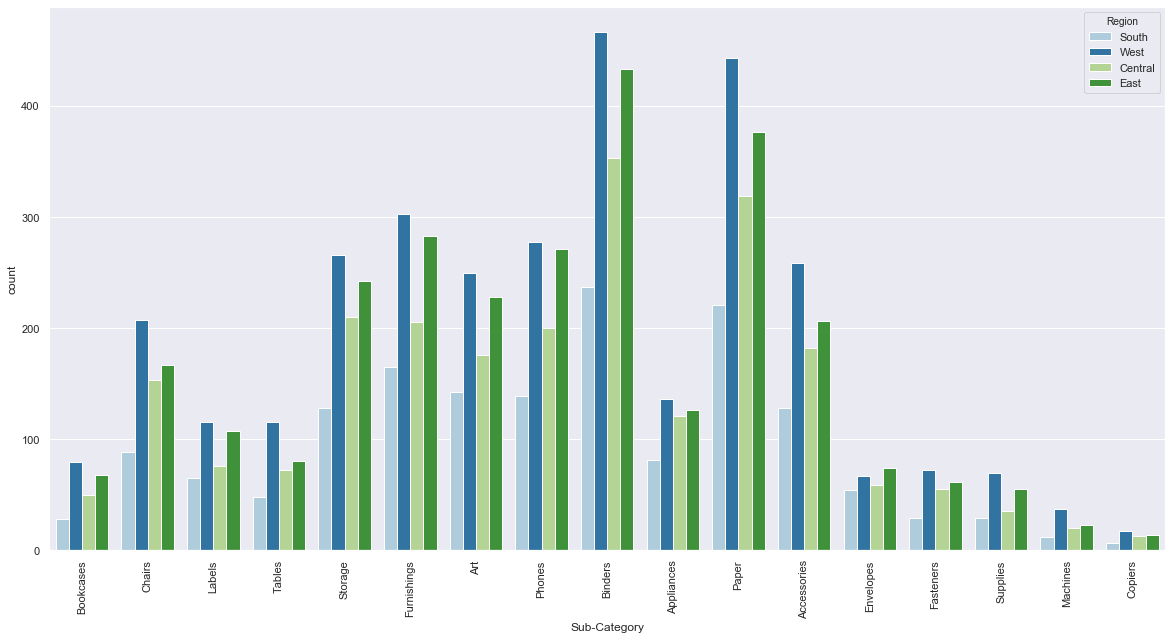

In [96]:
#Region-wise count of Sub-Category
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="Sub-Category", hue="Region", data=df3,palette='Paired')
plt.xticks(rotation='vertical')
plt.show()

#### People living in western part of United States tend to order more from the store.

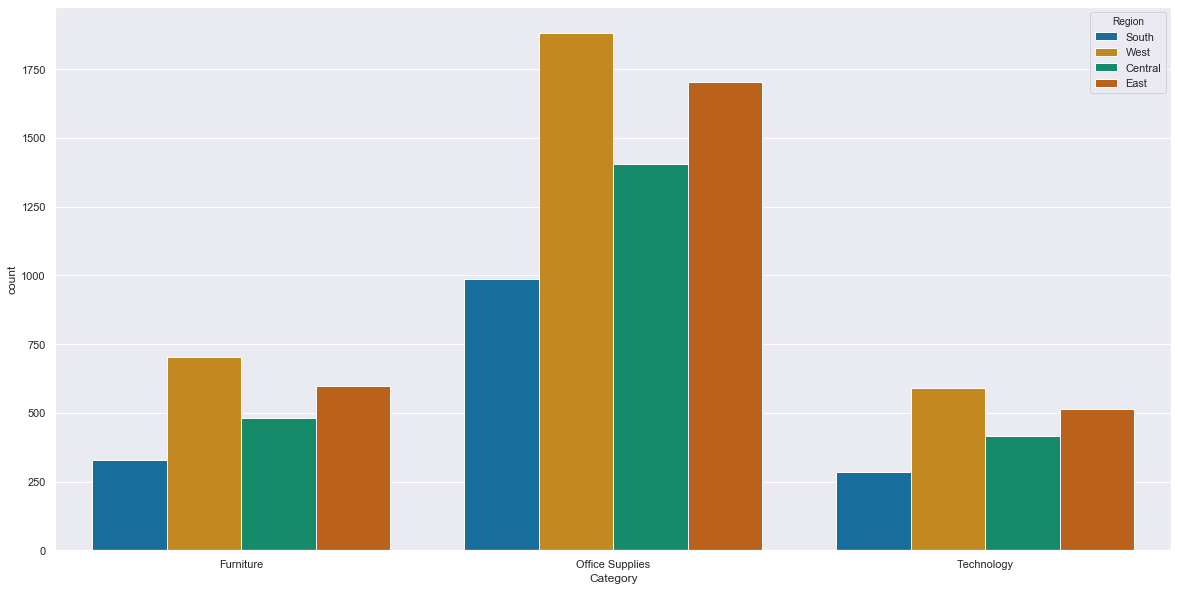

In [97]:
#Count of Category region-wise
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="Category", hue="Region", data=df3,palette='colorblind')
plt.xticks(rotation='0')
plt.show()

#### The fact that people residing in the western part of US order more from the store can also be seen from the plot above.

In [98]:
#adding new columns: 'Cost' and 'Profit %' to our dataframe to understand the data better.
df3['Cost']=df3['Sales']-df3['Profit']
df3['Profit %']=(df3['Profit']/df3['Cost'])*100
df3.sample(5)

C:\Users\Souvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Souvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
3487,Standard Class,Home Office,Fort Lauderdale,Florida,South,Office Supplies,Storage,147.184,2,0.2,-29.4368,176.6208,-16.666667
2592,Second Class,Corporate,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
1078,Second Class,Consumer,Seattle,Washington,West,Office Supplies,Storage,31.440,3,0.0,8.4888,22.9512,36.986301
5360,Standard Class,Corporate,Fayetteville,North Carolina,South,Furniture,Bookcases,198.272,8,0.2,-32.2192,230.4912,-13.978495
210,Standard Class,Consumer,Saginaw,Michigan,Central,Office Supplies,Storage,91.990,1,0.0,3.6796,88.3104,4.166667


In [99]:
#sorting the dataframe in decreasing order of 'Profit %'
df3.sort_values(['Profit %'],ascending=False)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
9652,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,595.380,6,0.0,297.6900,297.6900,100.000000
9768,Standard Class,Home Office,San Francisco,California,West,Office Supplies,Paper,50.040,6,0.0,25.0200,25.0200,100.000000
5061,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,43.980,2,0.0,21.9900,21.9900,100.000000
5068,Standard Class,Home Office,Trenton,Michigan,Central,Technology,Copiers,549.990,1,0.0,274.9950,274.9950,100.000000
6338,Standard Class,Corporate,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,First Class,Consumer,Abilene,Texas,Central,Office Supplies,Appliances,1.392,2,0.8,-3.7584,5.1504,-72.972973
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


In [100]:
# determining pairwise correlation of all the columns
df3.corr()

,Sales,Quantity,Discount,Profit,Cost,Profit %
Sales,1.000000,0.264007,-0.057966,0.485366,0.971632,-0.126756
Quantity,0.264007,1.000000,0.003181,0.148020,0.251140,0.005277
Discount,-0.057966,0.003181,1.000000,-0.348099,0.030227,-0.770570
Profit,0.485366,0.148020,-0.348099,1.000000,0.264825,0.304761
Cost,0.971632,0.251140,0.030227,0.264825,1.000000,-0.222238
Profit %,-0.126756,0.005277,-0.770570,0.304761,-0.222238,1.000000


In [101]:
#basic statistical information of the dataframe
df3.describe()

,Sales,Quantity,Discount,Profit,Cost,Profit %
count,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294,172.419742,32.394558
std,383.949264,2.222506,0.204991,94.164961,348.120232,40.983959
min,0.444000,1.000000,0.000000,-734.526400,0.554400,-73.333333
25%,17.088000,2.000000,0.000000,1.747200,12.519500,8.108108
50%,52.990000,3.000000,0.200000,8.611200,40.807200,36.986301
75%,203.520000,5.000000,0.200000,28.857600,174.916800,56.862745
max,8187.650000,14.000000,0.800000,793.716000,7860.144000,100.000000


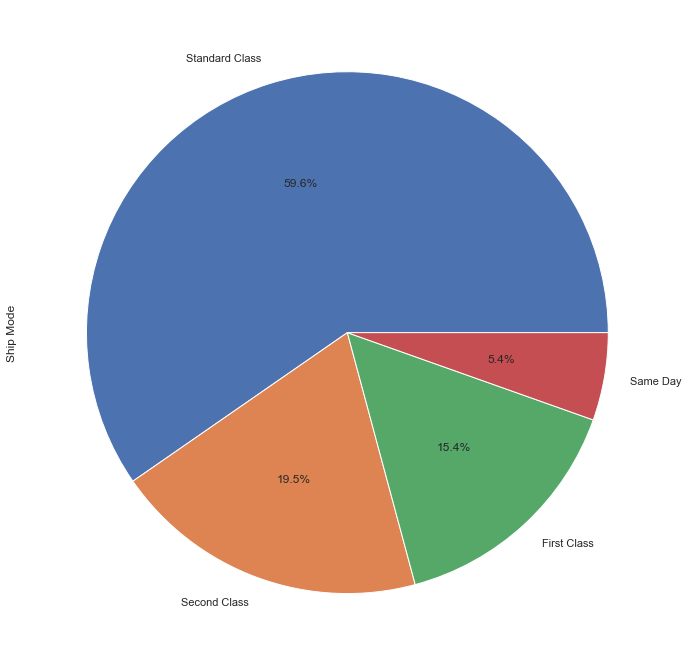

In [102]:
#Pie-chart of Ship Modes
plt.figure(figsize=(15,12))
df3['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### From the above plot, it is clearly seen that Standard Class is the major Ship Mode.

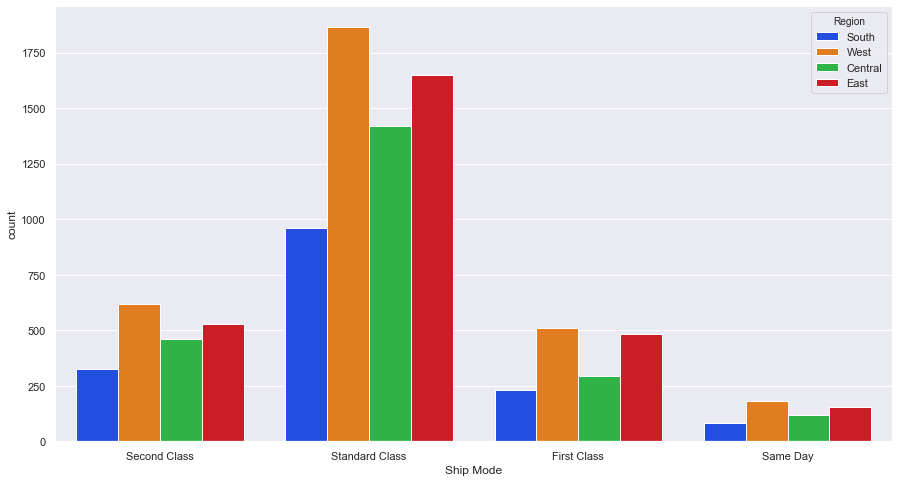

In [103]:
#Count of Ship Modes region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Ship Mode", hue="Region", data=df3,palette='bright')
plt.xticks(rotation=0)
plt.show()

#### From the above plot, it is evident that people from the western part of US order more from the superstore and Standard Class is the major Ship Mode for all four regions. There are very less number of orders in all the regions with Ship Mode 'Same Day'.

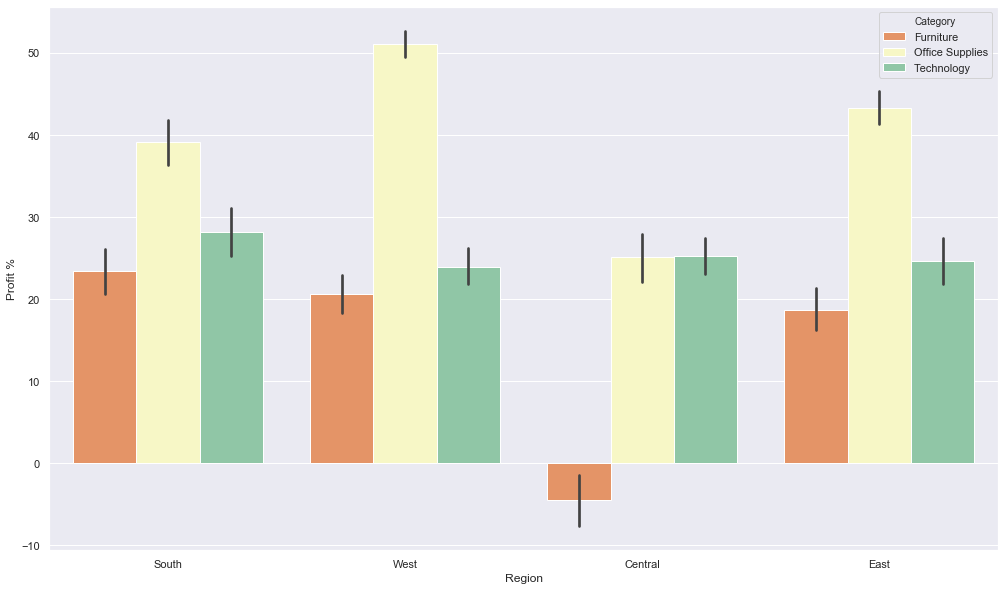

In [104]:
#Profit % in different Regions according to Category
sns.set(rc={'figure.figsize':(17,10)})
sns.barplot(x="Region", y="Profit %", hue="Category", data=df3, palette="Spectral")

#### The highest Profit is made on Office Supplies sold in the West region. Furniture sold in the Central region is at loss and hence, more work has to be done on that.

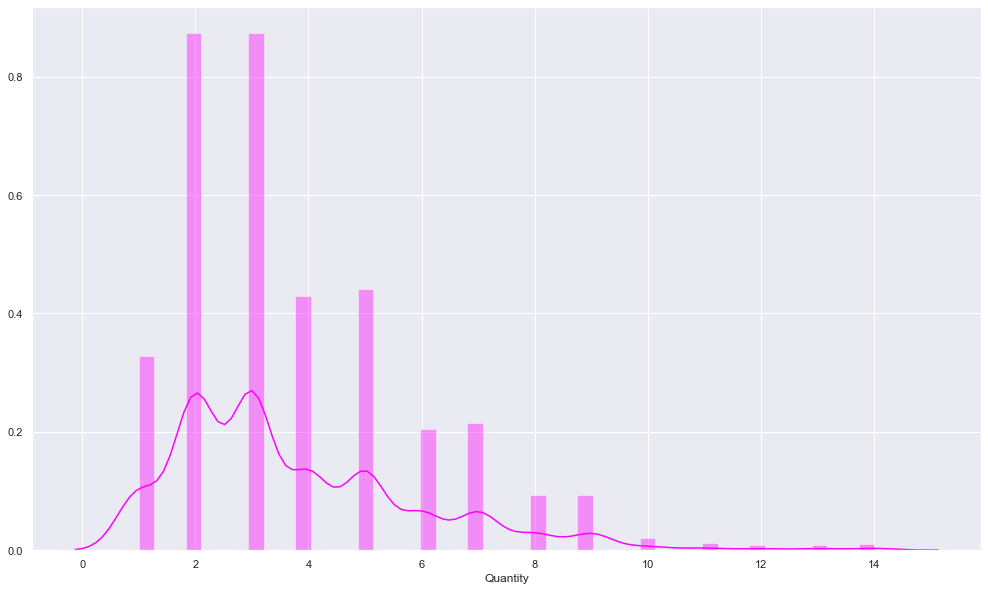

In [105]:
#distplot of Quantity
sns.set(rc={'figure.figsize':(17,10)})
sns.distplot(df3['Quantity'], color= 'fuchsia')
plt.show()

#### People generally buy products in Quantity ranging between 2 to 4 from the store.

In [106]:
#State-wise sales
df3['State'].value_counts()

California              1989
New York                1112
Texas                    974
Pennsylvania             581
Washington               498
Illinois                 488
Ohio                     464
Florida                  381
Michigan                 250
North Carolina           245
Arizona                  223
Virginia                 221
Georgia                  181
Colorado                 179
Tennessee                178
Indiana                  148
Kentucky                 138
Massachusetts            135
New Jersey               128
Oregon                   123
Wisconsin                110
Maryland                 104
Delaware                  95
Minnesota                 87
Connecticut               82
Oklahoma                  66
Missouri                  65
Alabama                   60
Arkansas                  59
Rhode Island              54
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nebraska      

#### California has the maximum sales followed by New York and Texas. Wyoming barely has any sales and hence, more focus has to be given on sales in Wyoming.

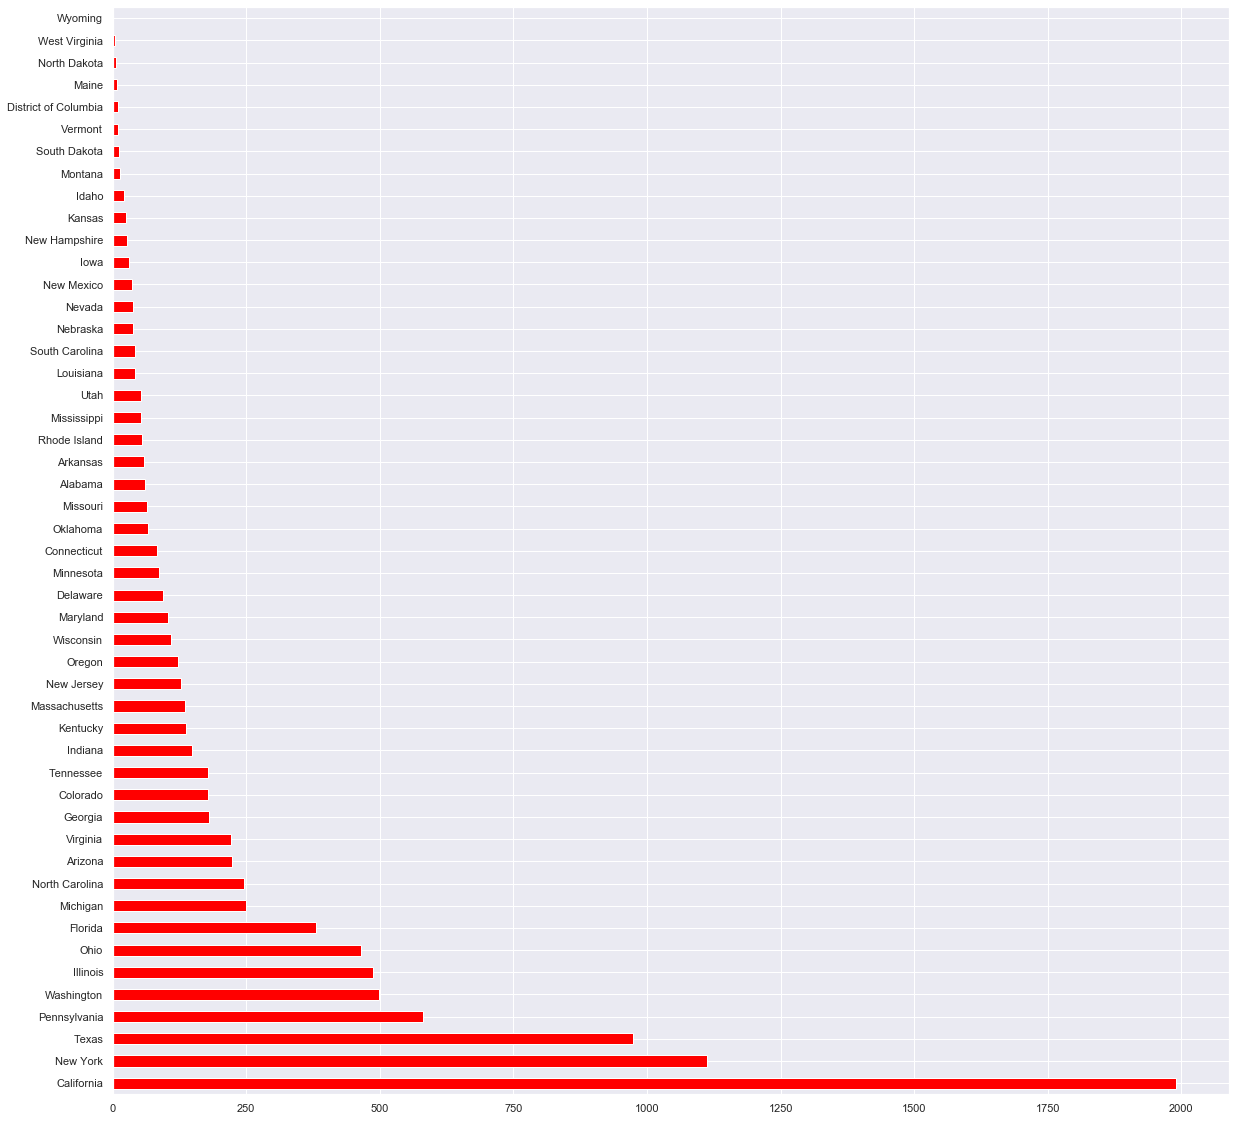

In [107]:
#state-wise plot to find out the best-performing and the under-performing States of US
plt.figure(figsize=[20,20])
df3['State'].value_counts().plot(kind='barh',color='red')

#### California is the best-performing state and Wyoming, West Virginia, North Dakota and Maine are the most under-performing states. More attention is needed in these states.

In [108]:
#City-wise Sales
df3['City'].value_counts()

New York City    901
Los Angeles      742
Philadelphia     532
San Francisco    505
Seattle          420
                ... 
Romeoville         1
Pensacola          1
Iowa City          1
Antioch            1
Santa Maria        1
Name: City, Length: 531, dtype: int64

#### New York City has highest sales among all the cities of US. Many cities like Romeoville, Iowa City, Antioch, Santa Maria and Pensacola have negligible sales. The store needs to boost their sales in these cities.

In [109]:
#Entries with Segment=Consumer
df3_consumer=df3[(df3['Segment']=="Consumer")]
df3_consumer.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,34.6906,40.845070
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656,5.3144,36.986301
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152,816.4368,11.111111
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,12.7215,45.454545
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,80.4300,42.857143
10,Standard Class,Consumer,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092,1620.8748,5.263158


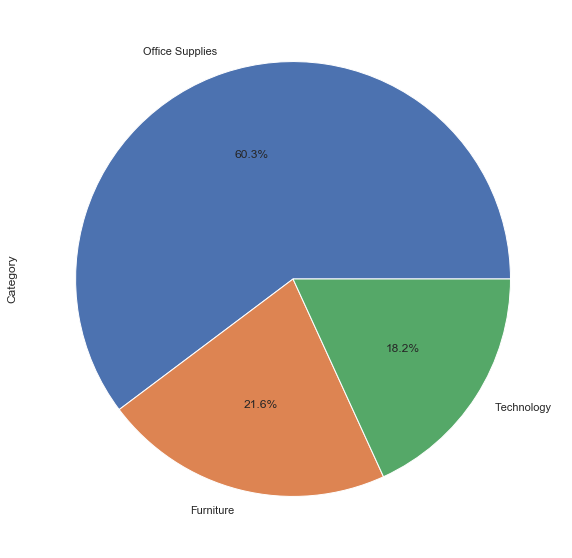

In [110]:
# Pie-chart showing the Categories in Consumer segment
df3_consumer['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Office Supplies dominate the Consumer segment followed by Furniture and Technology.

Text(0, 0.5, 'Sales')

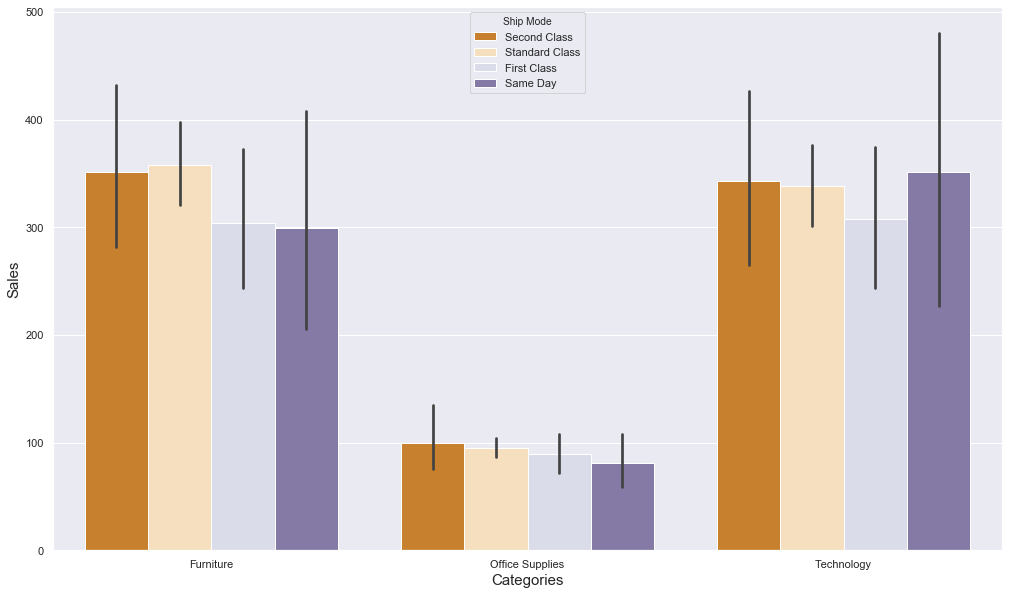

In [111]:
#Sales of each Category under Consumer Segment
sns.barplot(x="Category", y="Sales", data=df3_consumer, palette="PuOr",hue='Ship Mode')
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

#### Sales of Office Supplies in all the Ship Modes in the Consumer segment is very low compared to that of Furniture and Technology. More work has to be done to boost the sales of Office Supplies in the Consumer segment.

In [112]:
#Entries with Furniture category of Consumer segment
df3_furniture=df3_consumer[(df3_consumer['Category']=="Furniture")]
df3_furniture.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,34.6906,40.845070
10,Standard Class,Consumer,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092,1620.8748,5.263158
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,72.3916,-1.408451
24,Standard Class,Consumer,Orem,Utah,West,Furniture,Tables,1044.6300,3,0.00,240.2649,804.3651,29.870130
29,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,124.2000,3,0.20,15.5250,108.6750,14.285714
51,Standard Class,Consumer,New Albany,Indiana,Central,Furniture,Furnishings,6.1600,2,0.00,2.9568,3.2032,92.307692
52,Standard Class,Consumer,New Albany,Indiana,Central,Furniture,Chairs,89.9900,1,0.00,17.0981,72.8919,23.456790


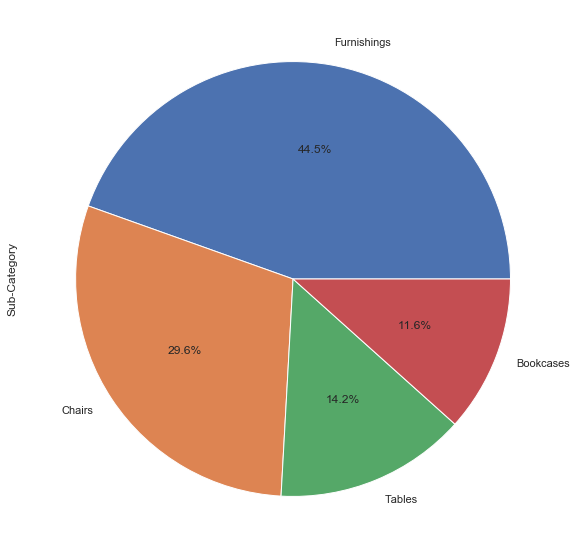

In [113]:
# Pie-chart of Sub-categories under the Furniture category in the Consumer segment
df3_furniture['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### There exists a wide variety of Furnishings under the Furniture category of the Consumer segment.

Text(0, 0.5, 'Profit')

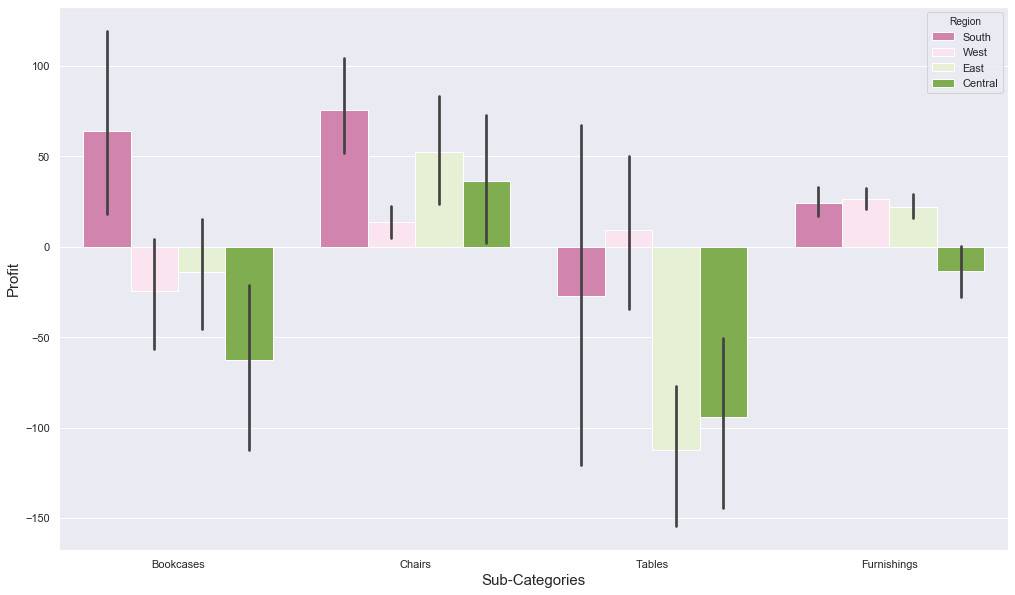

In [114]:
# Profit of Sub-categories under the Furniture category in the Consumer segment region-wise
sns.barplot(x="Sub-Category", y="Profit", data=df3_furniture, palette="PiYG",hue='Region')
plt.xlabel("Sub-Categories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

#### The sub-categories under the Furniture category of the Consumer segment that are at a loss are as follows: Bookcases (in West, East and Central regions), Tables (in South, East and Central regions) and Furnishings (in the Central region). Therefore, the store needs to work more in these areas to boost their profit.

In [115]:
#Entries with Segment=Corporate
df3_corporate=df3[(df3['Segment']=="Corporate")]
df3_corporate.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.7486,88.679245
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.460,7,0.0,5.0596,14.4004,35.135135
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884,44.6516,35.135135
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737,974.0703,12.676056
36,First Class,Corporate,Richardson,Texas,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630,338.8830,-43.661972
41,Standard Class,Corporate,Naperville,Illinois,Central,Technology,Phones,147.168,4,0.2,16.5564,130.6116,12.676056
42,Standard Class,Corporate,Los Angeles,California,West,Office Supplies,Storage,77.880,2,0.0,3.8940,73.9860,5.263158
43,Standard Class,Corporate,Melbourne,Florida,South,Office Supplies,Storage,95.616,2,0.2,9.5616,86.0544,11.111111
44,First Class,Corporate,Eagan,Minnesota,Central,Technology,Accessories,45.980,2,0.0,19.7714,26.2086,75.438596
45,First Class,Corporate,Eagan,Minnesota,Central,Office Supplies,Binders,17.460,2,0.0,8.2062,9.2538,88.679245


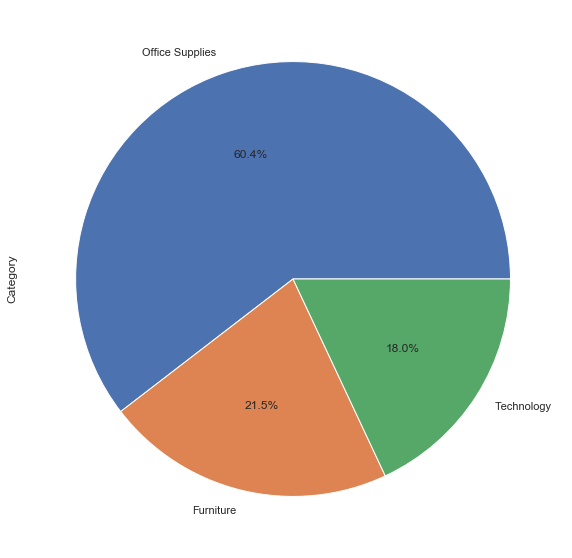

In [116]:
# Pie-chart showing the Categories in Corporate segment
df3_corporate['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Office Supplies dominate the Corporate Segment followed by Furniture and Technology.

Text(0, 0.5, 'Sales')

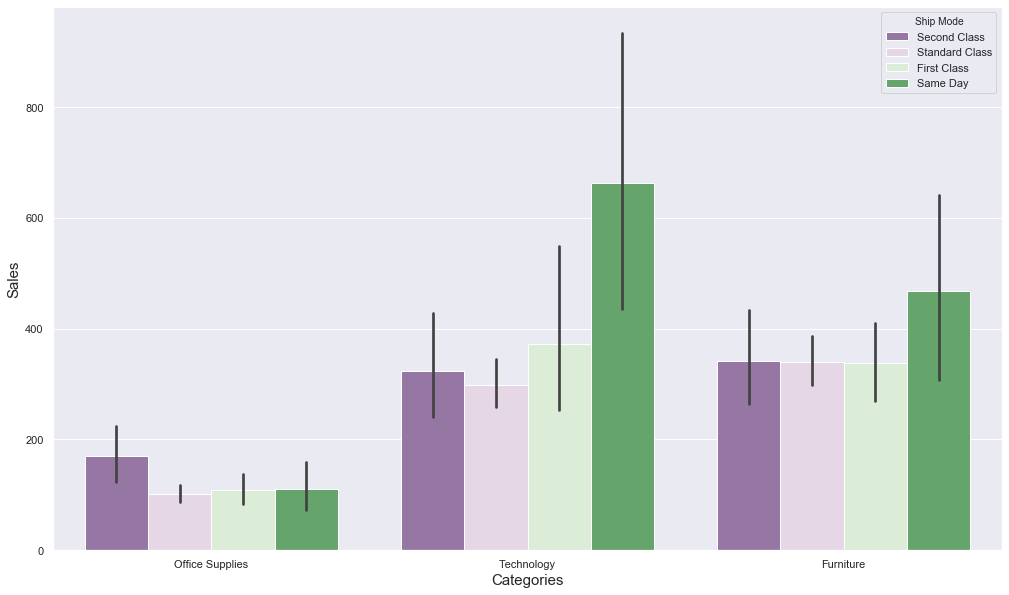

In [117]:
#Sales of each Category under Corporate Segment
sns.barplot(x="Category", y="Sales", data=df3_corporate, palette="PRGn",hue='Ship Mode')
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

#### Sales of Office Supplies in all the Ship Modes in the Corporate segment is very low compared to that of Furniture and Technology. More work has to be done to boost the sales of Office Supplies in the Corporate segment. The sales of Technology in the Corporate segment with Ship Mode as 'Same Day' is pretty high.

In [118]:
#Entries with Office Supplies category of Corporate segment
df3_ofc=df3_corporate[(df3_corporate['Category']=="Office Supplies")]
df3_ofc.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.7486,88.679245
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.460,7,0.0,5.0596,14.4004,35.135135
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884,44.6516,35.135135
42,Standard Class,Corporate,Los Angeles,California,West,Office Supplies,Storage,77.880,2,0.0,3.8940,73.9860,5.263158
43,Standard Class,Corporate,Melbourne,Florida,South,Office Supplies,Storage,95.616,2,0.2,9.5616,86.0544,11.111111
45,First Class,Corporate,Eagan,Minnesota,Central,Office Supplies,Binders,17.460,2,0.0,8.2062,9.2538,88.679245
53,Standard Class,Corporate,New York City,New York,East,Office Supplies,Fasteners,15.260,7,0.0,6.2566,9.0034,69.491525
67,Standard Class,Corporate,Gilbert,Arizona,West,Office Supplies,Art,1113.024,8,0.2,111.3024,1001.7216,11.111111
75,First Class,Corporate,Houston,Texas,Central,Office Supplies,Binders,1.248,3,0.8,-1.9344,3.1824,-60.784314
77,First Class,Corporate,Houston,Texas,Central,Office Supplies,Storage,27.240,3,0.2,2.7240,24.5160,11.111111


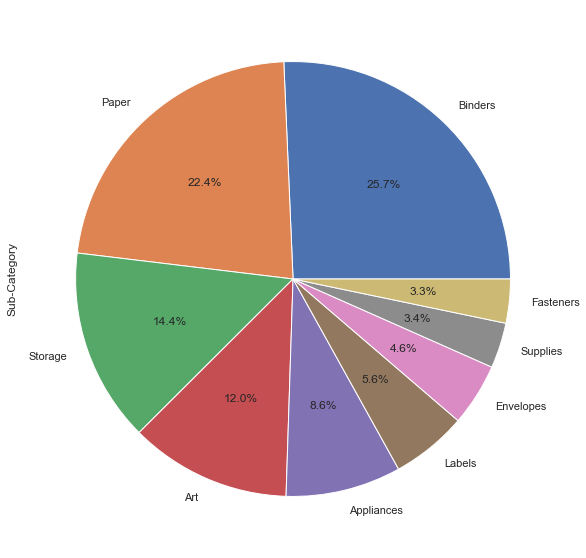

In [119]:
# Pie-chart of Sub-categories under the Office Supplies category in the Corporate segment
df3_ofc['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### There exists a wide variety of Binders under the Office Supplies category of the Corporate segment followed by Paper. These are the two most important sub-categories under the Office Supplies category of the Corporate segment.

Text(0, 0.5, 'Profit')

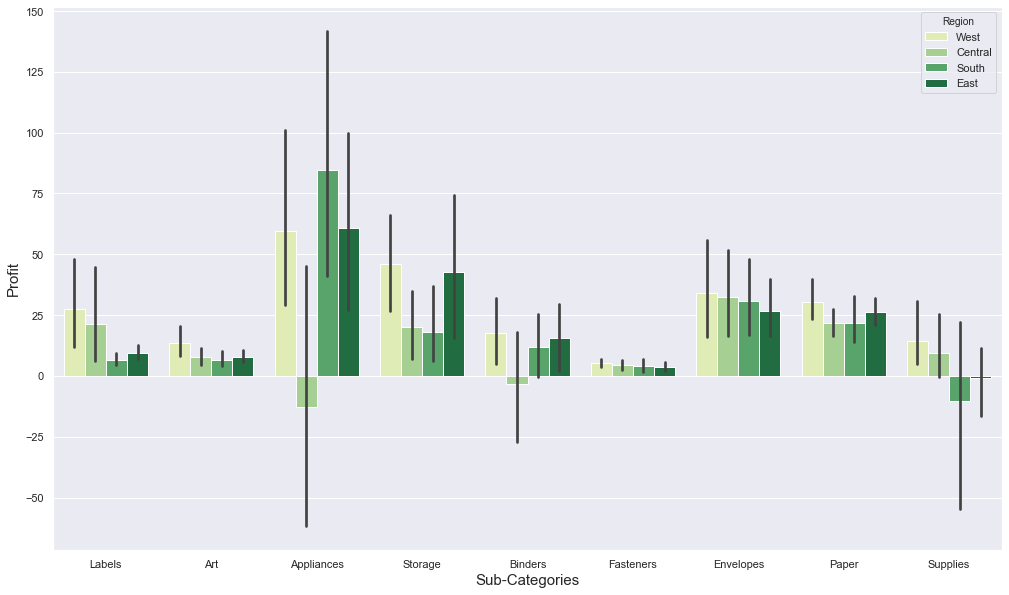

In [120]:
# Profit of Sub-categories under the Office Supplies category in the Corporate segment region-wise
sns.barplot(x="Sub-Category", y="Profit", data=df3_ofc, palette="YlGn",hue='Region')
plt.xlabel("Sub-Categories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

#### The sub-categories under the Office Supplies category of the Corporate segment that are at a loss are as follows: Appliances (in the Central region), Binders (in the Central region) and Supplies (in the South and East regions). Hence, the store needs to work more in these areas to boost their profit.

In [121]:
#Entries with Segment=Home Office
df3_ho=df3[(df3['Segment']=="Home Office")]
df3_ho.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,192.6680,-64.285714
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,6.3600,-60.000000
34,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468,19.5252,50.943396
37,Standard Class,Home Office,Houston,Texas,Central,Office Supplies,Envelopes,113.3280,9,0.20,35.4150,77.9130,45.454545
38,Standard Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764,579.3756,-8.108108
39,Standard Class,Home Office,Houston,Texas,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470,227.2050,-6.666667
40,Standard Class,Home Office,Houston,Texas,Central,Technology,Phones,371.1680,4,0.20,41.7564,329.4116,12.676056
66,Standard Class,Home Office,Chicago,Illinois,Central,Furniture,Chairs,213.1150,5,0.30,-15.2225,228.3375,-6.666667
84,First Class,Home Office,Chicago,Illinois,Central,Office Supplies,Storage,230.3760,3,0.20,-48.9549,279.3309,-17.525773
88,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Storage,158.3680,7,0.20,13.8572,144.5108,9.589041


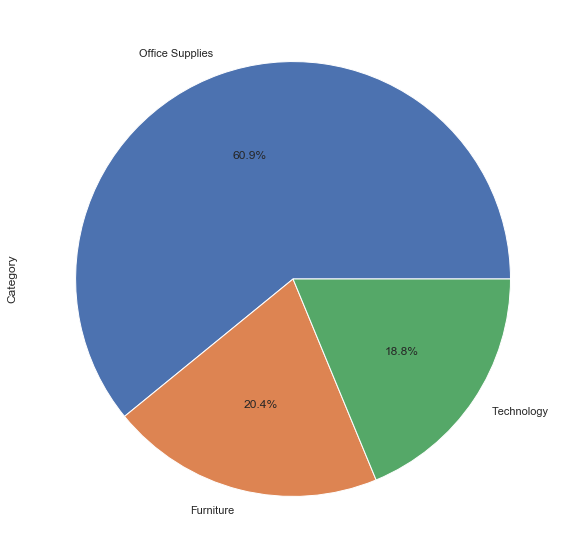

In [122]:
# Pie-chart showing the Categories in Home Office segment
df3_ho['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### Office Supplies dominate the Home Office segment followed by Furniture and Technology.

Text(0, 0.5, 'Sales')

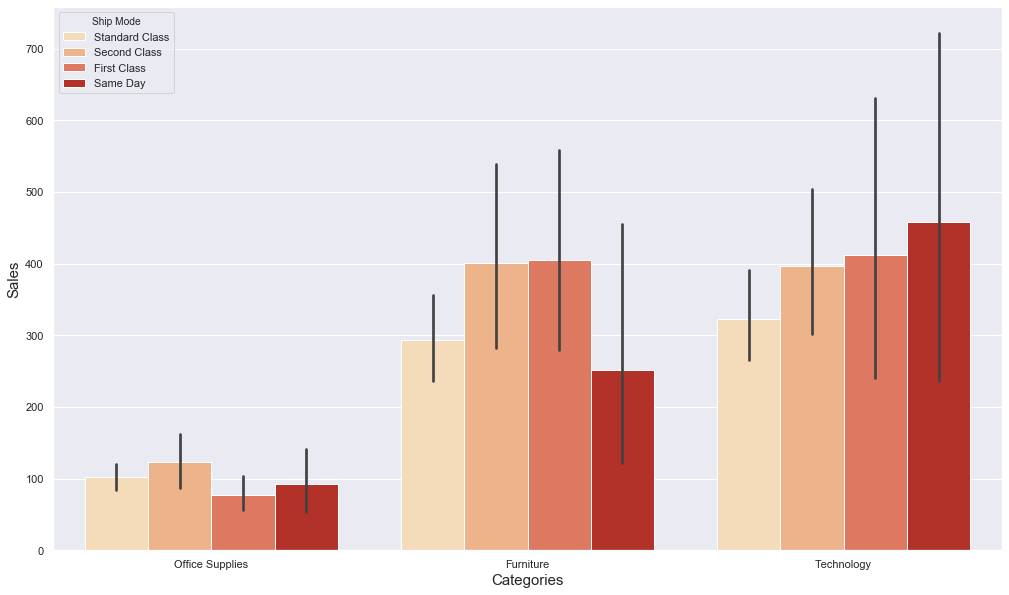

In [123]:
#Sales of each Category under Home Office segment
sns.barplot(x="Category", y="Sales", data=df3_ho, palette="OrRd",hue='Ship Mode')
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

#### Sales of Office Supplies in all the Ship Modes in the Home Office segment is very low compared to that of Furniture and Technology. More work has to be done to boost the sales of Office Supplies in the Home Office segment. The sales of Technology and Furniture is nearly equal.

In [124]:
#Entries with Technology category of Home Office segment
df3_technology=df3_ho[(df3_ho['Category']=="Technology")]
df3_technology.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
40,Standard Class,Home Office,Houston,Texas,Central,Technology,Phones,371.168,4,0.2,41.7564,329.4116,12.676056
100,Standard Class,Home Office,Chicago,Illinois,Central,Technology,Accessories,95.976,3,0.2,-10.7973,106.7733,-10.112360
109,Standard Class,Home Office,Orland Park,Illinois,Central,Technology,Accessories,339.960,5,0.2,67.9920,271.9680,25.000000
152,First Class,Home Office,Scottsdale,Arizona,West,Technology,Phones,203.184,2,0.2,15.2388,187.9452,8.108108
182,Second Class,Home Office,Monroe,Louisiana,South,Technology,Phones,503.960,4,0.0,131.0296,372.9304,35.135135
183,Second Class,Home Office,Monroe,Louisiana,South,Technology,Phones,149.950,5,0.0,41.9860,107.9640,38.888889
184,Second Class,Home Office,Monroe,Louisiana,South,Technology,Accessories,29.000,2,0.0,7.2500,21.7500,33.333333
186,Standard Class,Home Office,Los Angeles,California,West,Technology,Accessories,176.800,8,0.0,22.9840,153.8160,14.942529
190,First Class,Home Office,New York City,New York,East,Technology,Phones,71.760,6,0.0,20.0928,51.6672,38.888889
235,Standard Class,Home Office,Tampa,Florida,South,Technology,Accessories,617.976,3,0.2,-7.7247,625.7007,-1.234568


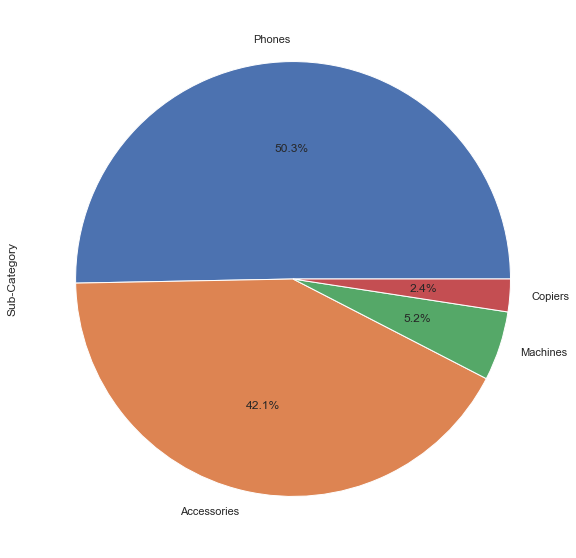

In [125]:
# Pie-chart of Sub-categories under the Technology category in the Home Office segment
df3_technology['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#### There exists a wide variety of Phones under the Technology category of the Home Office segment followed by Accessories. These are the two most important sub-categories under the Technology category of the Home Office segment.

Text(0, 0.5, 'Profit')

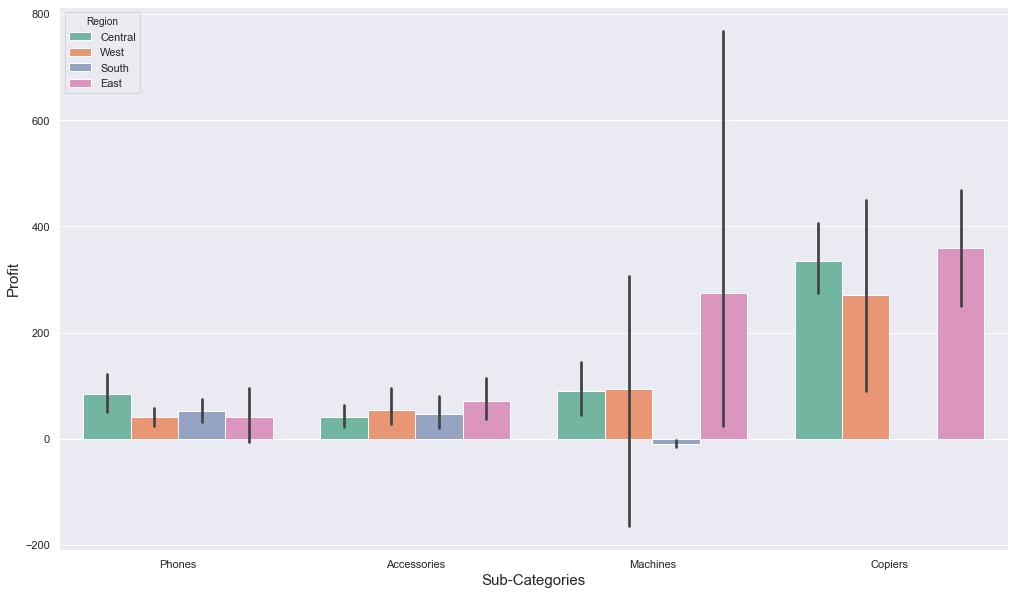

In [126]:
# Profit of Sub-categories under the Technology category in the Home Office segment region-wise
sns.barplot(x="Sub-Category", y="Profit", data=df3_technology, palette="Set2",hue='Region')
plt.xlabel("Sub-Categories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

#### The sub-category under the Technology category of the Home Office segment that is at a loss is: Machines (in the South region). Copiers in the South region is making zero profit. Hence, the store needs to work more in these areas to boost their profit.